In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style='white', context='paper',
                               rc={'font.size': 7, 
                                   'axes.titlesize': 9,
                                   'axes.labelsize': 8,
                                   'xtick.labelsize': 7,
                                   'ytick.labelsize': 7,
                                   'legend.fontsize' : 7,
                                   'legend.markerscale': 0.7,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.labelbottom': False,
                                   'ytick.labelleft': False,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt

---
# Figure 1 - Within/Between-class dimensionality

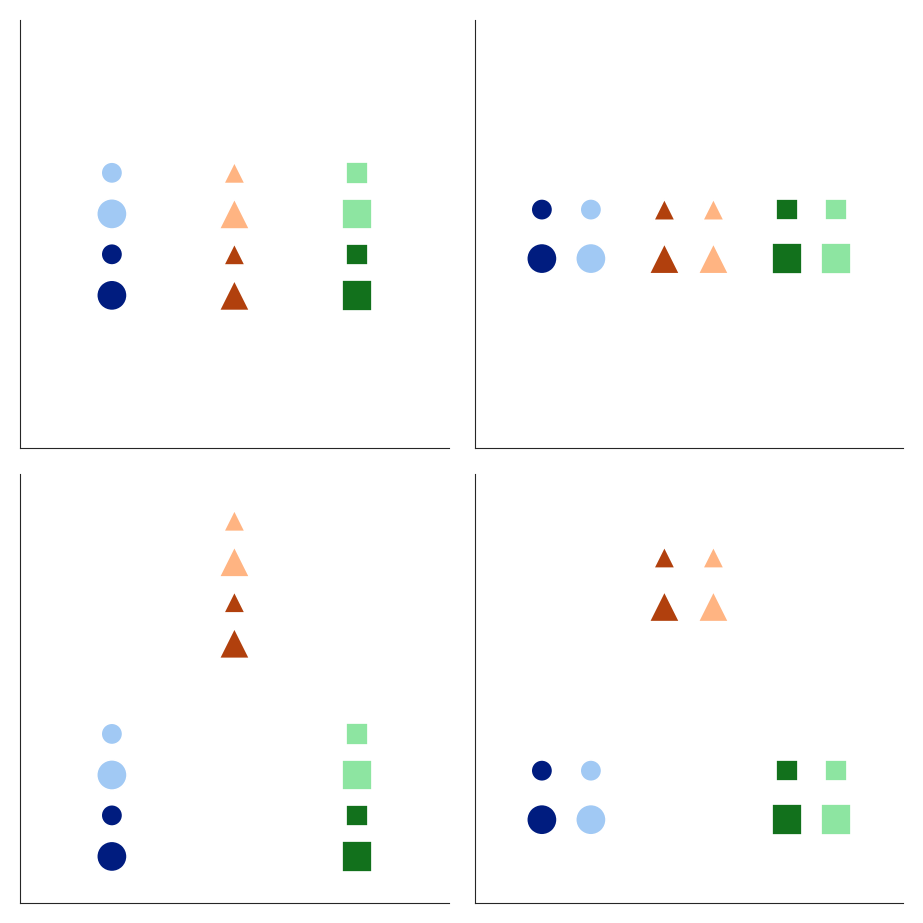

In [215]:
inter_centroids = np.array([
    [[-1, 0], [0, 0], [1, 0]],
    [[-1, -.87], [0, .87], [1, -.87]],
]) * 2

intra_samples = np.array([
    [[0, -1], [0, -.33], [0, .33], [0, 1]],
    [[-.4, -.4], [-.4, .4], [.4, -.4], [.4, .4]]
])

data = []
for inter, centroids in enumerate(inter_centroids):
    for intra, samples in enumerate(intra_samples):
        for cat, centroid in enumerate(centroids):
            for i, sample in enumerate(samples):
                x, y = sample + centroid
                feat_1 = i % 2
                feat_2 = i // 2
                data.append({'x': x, 'y': y, 'category': str(cat), 
                             'feat_1': feat_1, 'feat_2': feat_2,
                             'inter': inter, 'intra': intra})
data = pd.DataFrame(data)

fig, axs = plt.subplots(2, 2, figsize=(4.5, 4.5))

for i in range(2):
    for j in range(2):
        d = data[(data.intra == j) & (data.inter == i)]
        sns.scatterplot(data=d[d.feat_2 == 0], ax=axs[i, j], 
                        x='x', y='y',
                        style='category', size='feat_1', hue='category', 
                        markers=['o', '^', 's'], sizes=(60, 120), 
                        palette=sns.color_palette('dark')[:3])
        sns.scatterplot(data=d[d.feat_2 == 1], ax=axs[i, j], 
                        x='x', y='y',
                        style='category', size='feat_1', hue='category', 
                        markers=['o', '^', 's'], sizes=(60, 120), 
                        palette=sns.color_palette('pastel')[:3])
        
        axs[i, j].set(title=None, xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
        axs[i, j].legend().remove()

plt.savefig('saved/intro_01_within-between.png', dpi=300)
plt.show()

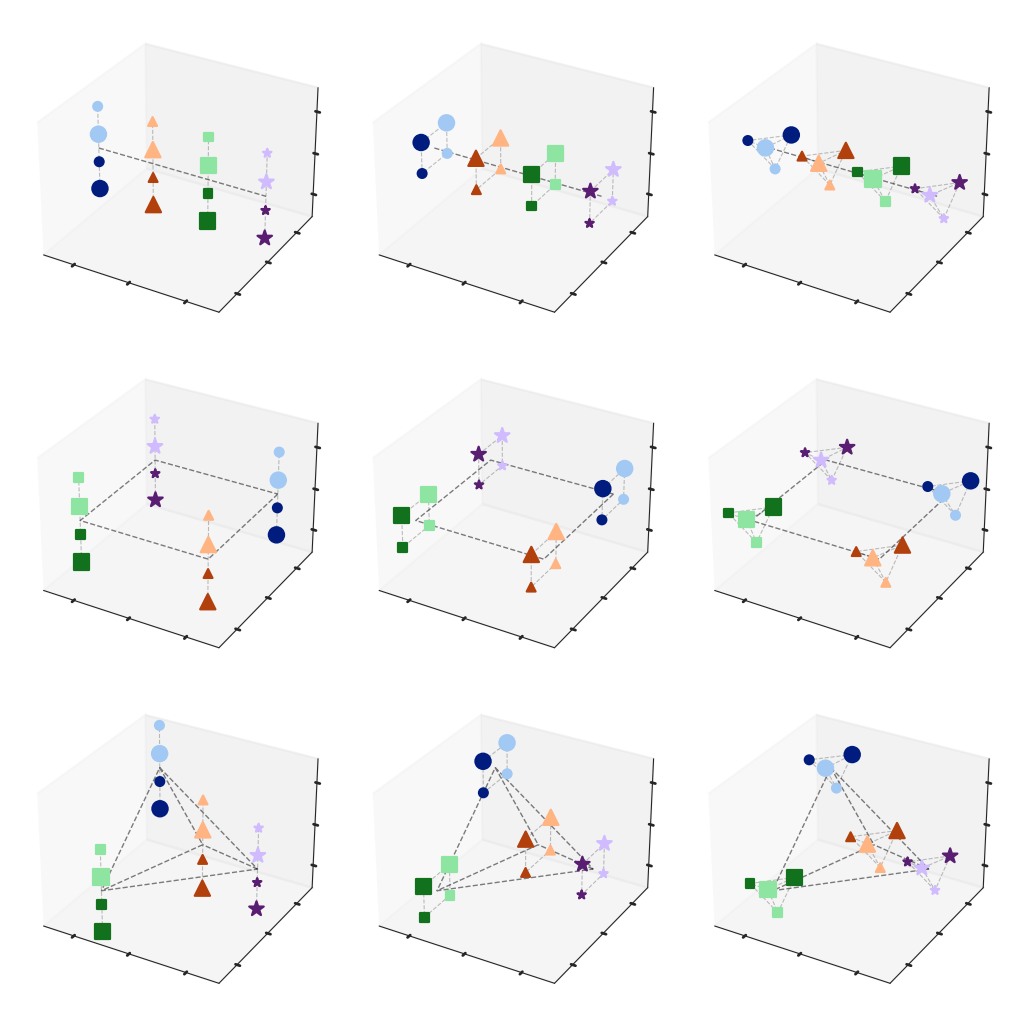

In [214]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

inter_centroids = np.array([
    [[-1, 0, 0], [-.33, 0, 0], [.33, 0, 0], [1, 0, 0]],
    [[.75, .75, 0], [.75, -.75, 0], [-.75, -.75, 0], [-.75, .75, 0]],
    [[-.6, .6, .6], [.6, -.6, .6], [-.6, -.6, -.6], [.6, .6, -.6]]
]) * 3

intra_samples = np.array([
    [[0, 0, -2], [0, 0, -.67], [0, 0, .67], [0, 0, 2]],
    [[0, -.75, .75], [0, -.75, -.75], [0, .75, .75], [0, .75, -.75]],
    [[.5, .5, .5], [-.5, -.5, .5], [-.5, .5, -.5], [.5, -.5, -.5]]
])

data = []
for inter, centroids in enumerate(inter_centroids):
    for intra, samples in enumerate(intra_samples):
        for cat, centroid in enumerate(centroids):
            for i, sample in enumerate(samples):
                x, y, z = sample + centroid
                feat_1 = (i + 1) % 2
                feat_2 = i // 2
                data.append({'x': x, 'y': y, 'z': z, 'category': cat, 
                             'feat_1': feat_1, 'feat_2': feat_2,
                             'inter': inter, 'intra': intra})
data = pd.DataFrame(data)

fig = plt.figure(figsize=(5, 5))

for inter in [0, 1, 2]:
    for intra in [0, 1, 2]:
        d = data[(data.inter == inter) & (data.intra == intra)]
        ax = fig.add_subplot(3, 3, inter * 3 + intra + 1, projection='3d')
        
        for cat in [0, 1, 2, 3]:
            marker = ['o', '^', 's', '*'][cat]
            d_i = d[(d.category == cat) & (d.feat_2 == 0)]
            ax.scatter(d_i.x, d_i.y, d_i.z, 
                       s=(d_i.feat_1 + .5) * 20, 
                       c=sns.color_palette('dark').as_hex()[cat if cat < 3 else 4], 
                       marker=marker, 
                       alpha=1)
            d_i = d[(d.category == cat) & (d.feat_2 == 1)]
            ax.scatter(d_i.x, d_i.y, d_i.z, 
                       s=(d_i.feat_1 + .5) * 20, 
                       c=sns.color_palette('pastel').as_hex()[cat if cat < 3 else 4], 
                       marker=marker, 
                       alpha=1)
            
            cat_samples = d[d.category == cat][['x', 'y', 'z']].values
            if intra == 0:
                ax.plot(cat_samples[[0, -1], 0], 
                        cat_samples[[0, -1], 1], 
                        cat_samples[[0, -1], 2], 
                        color='gray', linewidth=.4, linestyle='--', alpha=.5, zorder=-2)
            elif intra == 1:
                ax.plot(cat_samples[[0, 2, 3, 1, 0], 0], 
                        cat_samples[[0, 2, 3, 1, 0], 1], 
                        cat_samples[[0, 2, 3, 1, 0], 2], 
                        color='gray', linewidth=.4, linestyle='--', alpha=.5, zorder=-2)
            else:
                ax.plot(cat_samples[[0, 1, 2, 3, 0, 2], 0], 
                        cat_samples[[0, 1, 2, 3, 0, 2], 1], 
                        cat_samples[[0, 1, 2, 3, 0, 2], 2], 
                        color='gray', linewidth=.4, linestyle='--', alpha=.5, zorder=-2)
                ax.plot(cat_samples[[3, 1], 0], 
                        cat_samples[[3, 1], 1], 
                        cat_samples[[3, 1], 2], 
                        color='gray', linewidth=.4, linestyle='--', alpha=.5, zorder=-2)
            
        if inter == 0:
            ax.plot(inter_centroids[inter, [0, -1], 0], 
                    inter_centroids[inter, [0, -1], 1], 
                    inter_centroids[inter, [0, -1], 2], 
                    color='black', linewidth=.5, linestyle='--', alpha=.5, zorder=-1)
        elif inter == 1:
            ax.plot(inter_centroids[inter, [0, 1, 2, 3, 0], 0], 
                    inter_centroids[inter, [0, 1, 2, 3, 0], 1], 
                    inter_centroids[inter, [0, 1, 2, 3, 0], 2], 
                    color='black', linewidth=.5, linestyle='--', alpha=.5, zorder=-1)
        else:
            ax.plot(inter_centroids[inter, [0, 1, 2, 3, 0, 2], 0], 
                    inter_centroids[inter, [0, 1, 2, 3, 0, 2], 1], 
                    inter_centroids[inter, [0, 1, 2, 3, 0, 2], 2], 
                    color='black', linewidth=.5, linestyle='--', alpha=.5, zorder=-1)
            ax.plot(inter_centroids[inter, [3, 1], 0], 
                    inter_centroids[inter, [3, 1], 1], 
                    inter_centroids[inter, [3, 1], 2], 
                    color='black', linewidth=.5, linestyle='--', alpha=.5, zorder=-1)
            
        ax.set(title=None, xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3))
        ax.grid(False)

plt.savefig('saved/intro_01_within-between-3D.png', dpi=300)
plt.show()

/home/eric/anaconda3/envs/bs/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


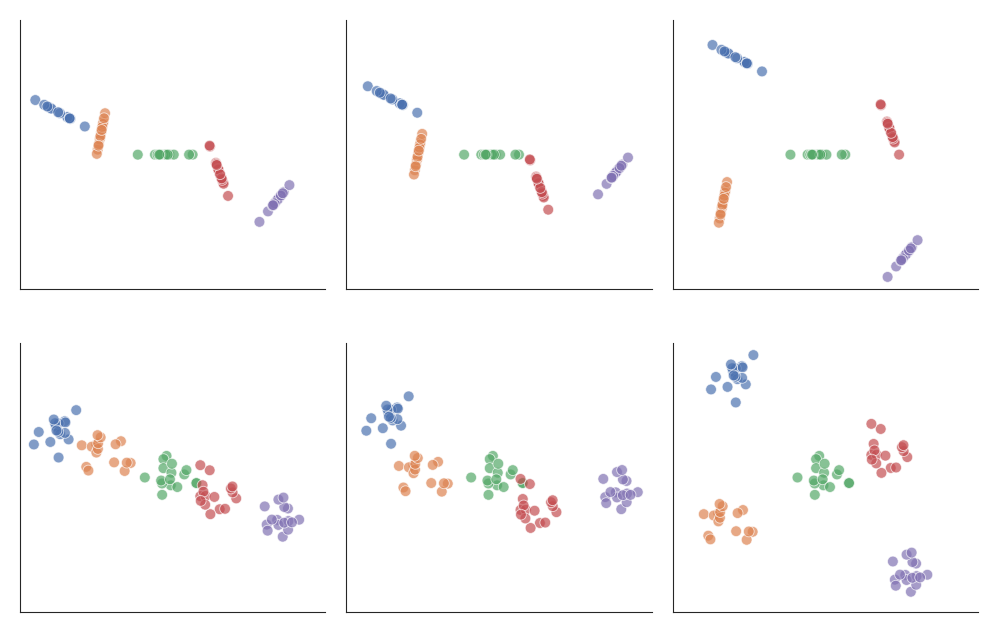

In [210]:
np.random.seed(1)

eigvals = np.array([[1, 0],       # ED = 1
                    [1, 1]])      # ED = 2

eigvecs = np.random.rand(5) * 2 * np.pi
eigvecs = np.stack([np.stack([np.cos(eigvecs), np.sin(eigvecs)], axis=-1), 
                    np.stack([-np.sin(eigvecs), np.cos(eigvecs)], axis=-1)], 
                   axis=-1)

class_centroids = np.array([
    [[-.75, 0], [-.45, 0], [0, 0], [.35, 0], [.75, 0]],
    [[-.75, .1], [-.45, -.15], [0, 0], [.35, -.1], [.75, .2]],
    [[-.75, .4], [-.45, -.5], [0, 0], [.35, .3], [.75, -.4]]
]) * 12
class_centroids = class_centroids @ np.array([[np.cos(np.pi/8), -np.sin(np.pi/8)], 
                                              [np.sin(np.pi/8), np.cos(np.pi/8)]])

data = []
for i, eigval in enumerate(eigvals):
    for c, eigvec in enumerate(eigvecs):
        samples = np.random.multivariate_normal(mean=[0, 0], cov=eigvec @ np.diag(eigval) @ eigvec.T, size=16)
        for j, centroid in enumerate(class_centroids):
            samples_shifted = samples + centroid[c]
            for x, y in samples_shifted:
                data.append({'x': x, 'y': y, 'intra': i, 'inter': j, 'class': str(c)})
data = pd.DataFrame(data)



g = sns.relplot(data=data, x='x', y='y', hue='class', row='intra', col='inter',
                alpha=0.7, s=15,
                legend=False, height=5/3)
for i in range(g.axes.shape[0]):
    for j in range(g.axes.shape[1]):
        ax = g.axes[i, j]
        ax.set_title(None)

plt.show()